In [1]:
import numpy as np
import pandas as pd
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from statsmodels.api import OLS

In [2]:
combined = pd.read_csv("./data/combined_data.csv",
                        parse_dates=[0], index_col=0)
combined

,solar_capacity,solar_generation_actual,wind_capacity,wind_generation_actual,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density
utc_timestamp,,,,,,,,,,,,,,,
2012-01-01 00:00:00+00:00,26049.0,0.0,26663.0,4871.0,4.8564,0.0,0.0,0.1742,4.951,0.0,0.0,0.0114,3.1034,0.8962,1.2252
2012-01-01 01:00:00+00:00,26053.0,0.0,26663.0,5409.0,5.0145,0.0,0.0,0.1624,5.200,0.0,0.0,0.0158,3.0225,0.8915,1.2242
2012-01-01 02:00:00+00:00,26053.0,0.0,26663.0,6094.0,5.2142,0.0,0.0,0.1637,5.468,0.0,0.0,0.0133,2.9386,0.8980,1.2230
2012-01-01 03:00:00+00:00,26053.0,0.0,26663.0,6734.0,5.4012,0.0,0.0,0.1486,5.767,0.0,0.0,0.0077,2.8491,0.9047,1.2214
2012-01-01 04:00:00+00:00,26053.0,0.0,26663.0,7370.0,5.5646,0.0,0.0,0.1386,6.038,0.0,0.0,0.0024,2.7522,0.9215,1.2199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,40634.0,0.0,49021.0,15303.0,4.2129,0.0,0.0,0.0079,-1.932,0.0,0.0,0.0017,0.0617,0.4790,1.2769
2016-12-31 20:00:00+00:00,40634.0,0.0,49021.0,15354.0,4.2875,0.0,0.0,0.0080,-2.090,0.0,0.0,0.0022,0.0631,0.4962,1.2775
2016-12-31 21:00:00+00:00,40634.0,0.0,49021.0,14848.0,4.2965,0.0,0.0,0.0075,-2.289,0.0,0.0,0.0022,0.0646,0.4924,1.2782


In [3]:
wind = combined[['wind_generation_actual', 'wind_capacity', 'windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
X_wind = wind[['wind_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
y_wind = wind['wind_generation_actual']
wind

,wind_generation_actual,wind_capacity,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,irradiance_surface,irradiance_toa,precipitation,snowfall,cloud_cover,air_density
utc_timestamp,,,,,,,,,,,
2012-01-01 00:00:00+00:00,4871.0,26663.0,4.8564,0.0,0.0,0.0,0.0,0.1742,0.0114,0.8962,1.2252
2012-01-01 01:00:00+00:00,5409.0,26663.0,5.0145,0.0,0.0,0.0,0.0,0.1624,0.0158,0.8915,1.2242
2012-01-01 02:00:00+00:00,6094.0,26663.0,5.2142,0.0,0.0,0.0,0.0,0.1637,0.0133,0.8980,1.2230
2012-01-01 03:00:00+00:00,6734.0,26663.0,5.4012,0.0,0.0,0.0,0.0,0.1486,0.0077,0.9047,1.2214
2012-01-01 04:00:00+00:00,7370.0,26663.0,5.5646,0.0,0.0,0.0,0.0,0.1386,0.0024,0.9215,1.2199
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,15303.0,49021.0,4.2129,0.0,0.0,0.0,0.0,0.0079,0.0017,0.4790,1.2769
2016-12-31 20:00:00+00:00,15354.0,49021.0,4.2875,0.0,0.0,0.0,0.0,0.0080,0.0022,0.4962,1.2775
2016-12-31 21:00:00+00:00,14848.0,49021.0,4.2965,0.0,0.0,0.0,0.0,0.0075,0.0022,0.4924,1.2782


In [5]:
# We will train the machine learning algorithms on the data for the years 2014 and 2015
X_train_master = X_wind.loc[(X_wind.index >= "2012-01-01 00:00:00") & (X_wind.index <= "2014-12-31 23:00:00")]
y_train = y_wind.loc[(X_wind.index >= "2012-01-01 00:00:00") & (X_wind.index <= "2014-12-31 23:00:00")]

# We will test the models on the data for the year 2016
X_test_master = X_wind.loc[(X_wind.index >= "2015-01-01 00:00:00") & (X_wind.index <= "2016-12-31 23:00:00")]
y_test = y_wind.loc[(X_wind.index >= "2015-01-01 00:00:00") & (X_wind.index <= "2016-12-31 23:00:00")]

In [6]:

# Assuming X_train_master, X_test_master, and y_train, y_test are your datasets
# Replace this with your actual data loading code

# Assuming selected_features are your relevant features
selected_features = ['wind_capacity',
                     'windspeed_10m',
                     'radiation_direct_horizontal',
                     'radiation_diffuse_horizontal',
                     'irradiance_surface',
                     'irradiance_toa',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

# Extract selected features from the master datasets
X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

# Convert selected features to numeric (remove commas and convert to float)
X_train = X_train.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
X_test = X_test.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))

# Impute missing values in features using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Convert target variables to numeric (remove commas and convert to float)
y_train = pd.to_numeric(y_train.astype(str).str.replace(',', ''), errors='coerce')

# Impute missing values in the target variable using mean imputation
y_train = pd.DataFrame(imputer.fit_transform(y_train.values.reshape(-1, 1)), columns=['target_column'])['target_column']

# Drop rows with missing values in the target variable
Xy_train = pd.concat([X_train, y_train], axis=1)
Xy_train = Xy_train.dropna()
X_train = Xy_train.iloc[:, :-1]
y_train = Xy_train.iloc[:, -1]

# Frist, we train the model for the prediction for wind power generation based on weather data.
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"The average score for the LinearRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
r2 = r2_score(y_test, predictions_lr)
print(f"The R2 score of the LinearRegression model (test) is: %0.3f" % r2)

The average score for the LinearRegression model (training) is: 0.825
The R2 score of the LinearRegression model (test) is: 0.758


In [7]:
# Further information on the LinearRegression model
OLS(y_train, X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          target_column   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                          3.647e+04
Date:                Tue, 19 Dec 2023   Prob (F-statistic):                        0.00
Time:                        12:33:18   Log-Likelihood:                     -2.3609e+05
No. Observations:               26304   AIC:                                  4.722e+05
Df Residuals:                   26294   BIC:                                  4.723e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
wind_capacity                    0.1574      0.004     40.840      0.000       0.150       0.165
windspeed_10m                 2739.2334      7.453    367.538      0.000    2724.625    2753.842
radiation_direct_horizontal    5.92e+05   7.28e+05      0.813      0.416   -8.35e+05    2.02e+06
radiation_diffuse_horizontal   5.92e+05   7.28e+05      0.813      0.416   -8.35e+05    2.02e+06
irradiance_surface            -5.92e+05   7.28e+05     -0.813      0.416   -2.02e+06    8.35e+05
irradiance_toa                  -2.5403      0.320     -7.935      0.000      -3.168      -1.913
precipitation                -3329.8354    100.344    -33.184      0.000   -3526.516   -3133.155
snowfall                     -7341.0286    462.902    -15.859      0.000   -8248.341   -6433.716
cloud_cover                    841.7678     58.690     14.343      0.000     726.732     956.803
air_density                  -8058.5084    103.816    -77.623      0.000   -8261.994   -7855.023
==============================================================================
Omnibus:                      813.849   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1185.303
Skew:                           0.322   Prob(JB):                    4.12e-258
Kurtosis:                       3.817   Cond. No.                     3.31e+09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.31e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
#No need just using to increase the data
import statsmodels.api as sm

# Assuming X_train and y_train are your training data
# Replace this with your actual data

# Add a constant term to the independent variables matrix
X_train_with_const = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_with_const).fit()

# Print the summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          target_column   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 1.487e+04
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:33:56   Log-Likelihood:            -2.3609e+05
No. Observations:               26304   AIC:                         4.722e+05
Df Residuals:                   26293   BIC:                         4.723e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

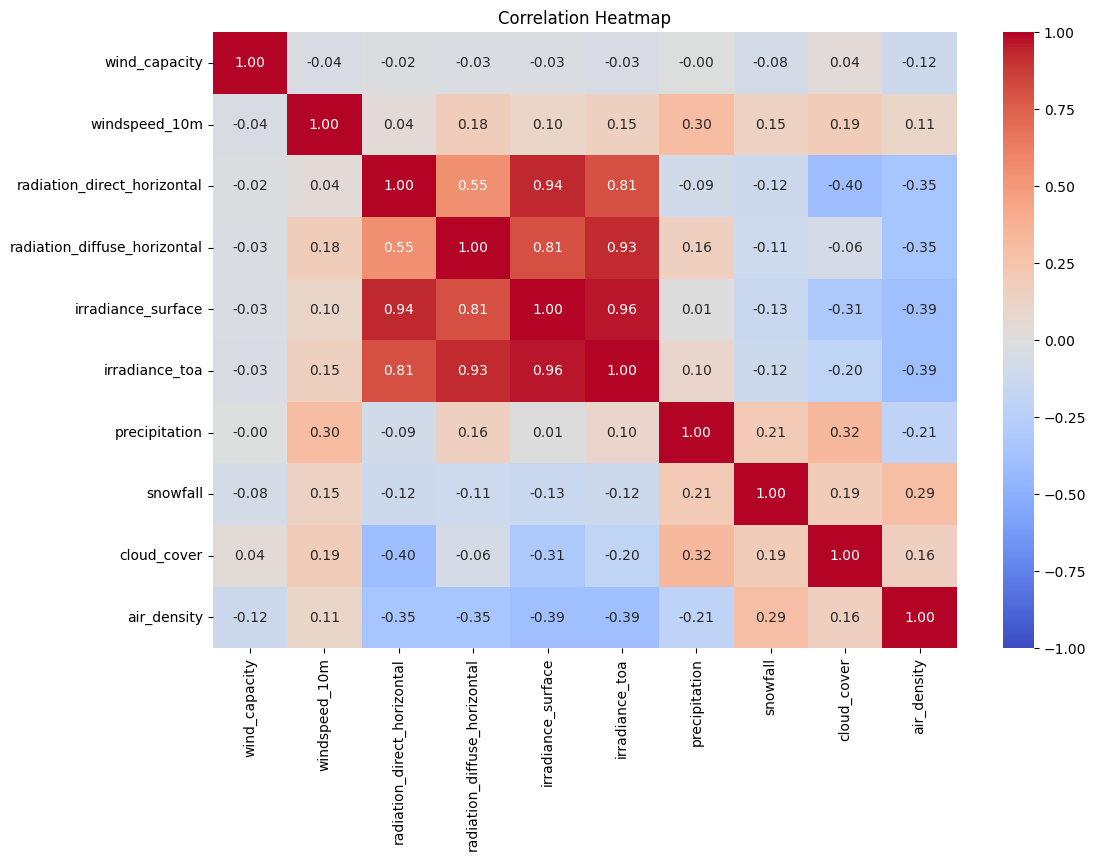

In [9]:
corr_matrix = X_train.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
selected_features = ['wind_capacity',
                     'windspeed_10m',
                     'irradiance_surface',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [11]:
# Frist, we train the model for the prediction for wind power generation based on weather data.
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"The average score for the LinearRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
r2 = r2_score(y_test, predictions_lr)
print(f"The R2 score of the LinearRegression model (test) is: %0.3f" % r2)

The average score for the LinearRegression model (training) is: 0.815
The R2 score of the LinearRegression model (test) is: 0.751


In [15]:
# Assuming X_train and y_train are your training data
# Resetting indices for both X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Add a constant term to the independent variables matrix
X_train_with_const = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_with_const).fit()

# Print the summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          target_column   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 1.986e+04
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:36:42   Log-Likelihood:            -2.3683e+05
No. Observations:               26304   AIC:                         4.737e+05
Df Residuals:                   26296   BIC:                         4.737e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                846.2528    530

In [16]:
selected_features = ['windspeed_10m']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [17]:
# Frist, we train the model for the prediction for wind power generation based on weather data.
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"The average score for the LinearRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
r2 = r2_score(y_test, predictions_lr)
print(f"The R2 score of the LinearRegression model (test) is: %0.3f" % r2)

The average score for the LinearRegression model (training) is: 0.725
The R2 score of the LinearRegression model (test) is: 0.492


In [19]:
# Reset indices
X_train_reset = X_train.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

# Frist, we train the model for the prediction for solar power generation based on weather data.
lr = LinearRegression()
lr.fit(X_train_reset, y_train_reset)

# Print R2 score
predictions_lr = lr.predict(X_test)
r2 = r2_score(y_test, predictions_lr)
print(f"The R2 score of the LinearRegression model (test) is: {r2}")

# Further information on the LinearRegression model
X_train_reset = sm.add_constant(X_train_reset)  # add a constant term to the predictor
ols_model = OLS(y_train_reset, X_train_reset).fit()
print(ols_model.summary())

The R2 score of the LinearRegression model (test) is: 0.4920397882191617
                            OLS Regression Results                            
Dep. Variable:          target_column   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                 8.527e+04
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:37:53   Log-Likelihood:            -2.4201e+05
No. Observations:               26304   AIC:                         4.840e+05
Df Residuals:                   26302   BIC:                         4.840e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [20]:
selected_features = ['wind_capacity',
                     'windspeed_10m',
                     'radiation_direct_horizontal',
                     'radiation_diffuse_horizontal',
                     'irradiance_surface',
                     'irradiance_toa',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [21]:
# Frist, we train the model for the prediction for wind power generation based on weather data.
dt = DecisionTreeRegressor()
scores = cross_val_score(dt, X_train, y_train, cv=5)
print(f"The average score for the DecisionTreeRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
dt.fit(X_train, y_train)
predictions_dt = dt.predict(X_test)
r2 = r2_score(y_test, predictions_dt)
print(f"The R2 score of the DecisionTreeRegression model (test) is: %0.3f" % r2)

The average score for the DecisionTreeRegression model (training) is: 0.729
The R2 score of the DecisionTreeRegression model (test) is: 0.648


In [22]:
selected_features = ['wind_capacity',
                     'windspeed_10m',
                     'irradiance_surface',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [23]:
# Frist, we train the model for the prediction for solar power generation based on weather data.
dt = DecisionTreeRegressor()
scores = cross_val_score(dt, X_train, y_train, cv=5)
print(f"The average score for the DecisionTreeRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
dt.fit(X_train, y_train)
predictions_dt = dt.predict(X_test)
r2 = r2_score(y_test, predictions_dt)
print(f"The R2 score of the DecisionTreeRegression model (test) is: %0.3f" % r2)

The average score for the DecisionTreeRegression model (training) is: 0.707
The R2 score of the DecisionTreeRegression model (test) is: 0.680


In [24]:
selected_features = ['windspeed_10m']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [25]:
# Frist, we train the model for the prediction for wind power generation based on weather data.
dt = DecisionTreeRegressor()
scores = cross_val_score(dt, X_train, y_train, cv=5)
print(f"The average score for the DecisionTreeRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
dt.fit(X_train, y_train)
predictions_dt = dt.predict(X_test)
r2 = r2_score(y_test, predictions_dt)
print(f"The R2 score of the DecisionTreeRegression model (test) is: %0.3f" % r2)

The average score for the DecisionTreeRegression model (training) is: 0.518
The R2 score of the DecisionTreeRegression model (test) is: 0.403


In [26]:
selected_features = ['wind_capacity',
                     'windspeed_10m',
                     'radiation_direct_horizontal',
                     'radiation_diffuse_horizontal',
                     'irradiance_surface',
                     'irradiance_toa',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [27]:
# Frist, we train the model for the prediction for wind power generation based on weather data.
rf = RandomForestRegressor()
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"The average score for the RandomForestRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
r2 = r2_score(y_test, predictions_rf)
print(f"The R2 score of the RandomForestRegression model (test) is: %0.3f" % r2)

The average score for the RandomForestRegression model (training) is: 0.851
The R2 score of the RandomForestRegression model (test) is: 0.734


In [28]:
selected_features = ['wind_capacity',
                     'windspeed_10m',
                     'irradiance_surface',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [29]:
# Frist, we train the model for the prediction for wind power generation based on weather data.
rf = RandomForestRegressor()
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"The average score for the RandomForestRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
r2 = r2_score(y_test, predictions_rf)
print(f"The R2 score of the RandomForestRegression model (test) is: %0.3f" % r2)

The average score for the RandomForestRegression model (training) is: 0.851
The R2 score of the RandomForestRegression model (test) is: 0.733


In [30]:
selected_features = ['windspeed_10m']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [31]:
# Frist, we train the model for the prediction for wind power generation based on weather data.
rf = RandomForestRegressor()
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"The average score for the RandomForestRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
r2 = r2_score(y_test, predictions_rf)
print(f"The R2 score of the RandomForestRegression model (test) is: %0.3f" % r2)

The average score for the RandomForestRegression model (training) is: 0.633
The R2 score of the RandomForestRegression model (test) is: 0.451


In [32]:
selected_features = ['wind_capacity',
                     'windspeed_10m',
                     'irradiance_surface',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [33]:
# Check the behaviour of the RandomForestRegression with the following number of decision trees
list_no_trees = [2, 5, 10, 20, 50, 100, 200]

for i in range(len(list_no_trees)):
    rf = RandomForestRegressor(n_estimators=list_no_trees[i])
    print(f"\nFor a RandomForestRegression model with {list_no_trees[i]} decision trees:")
    scores = cross_val_score(rf, X_train, y_train, cv=5)
    print(f"The average score for the training of the model is: %0.3f" % np.mean(scores))
    rf.fit(X_train, y_train)
    predictions_rf = rf.predict(X_test)
    r2 = r2_score(y_test, predictions_rf)
    print(f"The R2 score for the validation of the model is: %0.3f" % r2)


For a RandomForestRegression model with 2 decision trees:
The average score for the training of the model is: 0.789
The R2 score for the validation of the model is: 0.707

For a RandomForestRegression model with 5 decision trees:
The average score for the training of the model is: 0.815
The R2 score for the validation of the model is: 0.723

For a RandomForestRegression model with 10 decision trees:
The average score for the training of the model is: 0.839
The R2 score for the validation of the model is: 0.720

For a RandomForestRegression model with 20 decision trees:
The average score for the training of the model is: 0.845
The R2 score for the validation of the model is: 0.739

For a RandomForestRegression model with 50 decision trees:
The average score for the training of the model is: 0.850
The R2 score for the validation of the model is: 0.731

For a RandomForestRegression model with 100 decision trees:
The average score for the training of the model is: 0.850
The R2 score for t

In [34]:
# We intend to find out which features are most predictive of the wind power generation.

# In order to explain feature selection, we add a column of random numbers. 
# Any feature less important than a random column should be tossed out.

np.random.seed(seed = 42)
wind_2 = wind.copy()
wind_2['random'] = np.random.random(size = len(X_wind))

X_wind_2 = wind_2[['wind_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density', 'random']]
y_wind = wind_2['wind_generation_actual']


# We will train the machine learning algorithms on the data for the years 2014 and 2015
X_train_master_2 = X_wind_2.loc[(X_wind_2.index >= "2014-01-01 00:00:00") & (X_wind_2.index <= "2015-12-31 23:00:00")]
y_train = y_wind.loc[(X_wind_2.index >= "2014-01-01 00:00:00") & (X_wind_2.index <= "2015-12-31 23:00:00")]

# We will test the models on the data for the year 2016
X_test_master_2 = X_wind_2.loc[(X_wind_2.index >= "2016-01-01 00:00:00") & (X_wind_2.index <= "2016-12-31 23:00:00")]
y_test = y_wind.loc[(X_wind_2.index >= "2016-01-01 00:00:00") & (X_wind_2.index <= "2016-12-31 23:00:00")]

selected_features = ['wind_capacity',
                     'windspeed_10m',
                     'radiation_direct_horizontal',
                     'radiation_diffuse_horizontal',
                     'irradiance_surface',
                     'irradiance_toa',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density',
                     'random']

X_train = X_train_master_2[selected_features]
X_test = X_test_master_2[selected_features]

In [36]:
rf = RandomForestRegressor(n_estimators=20)
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'constant' as well
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Now, fit the model
rf = RandomForestRegressor(n_estimators=20)
rf.fit(X_train, y_train)

rf_features_dict = {}

for score, feat in zip(map(lambda x: round(x, 3), rf.feature_importances_), X_train.columns):
    rf_features_dict[feat] = score
    
rf_features_dict_sorted = sorted(rf_features_dict.items(), key=lambda x: x[1], reverse=True)

df= pd.DataFrame(rf_features_dict_sorted, columns=['features', 'importances'])

print("Features sorted by their score for the RandomForestRegression model:")
df

Features sorted by their score for the RandomForestRegression model:


,features,importances
0,windspeed_10m,0.790
1,wind_capacity,0.073
2,irradiance_toa,0.043
3,radiation_diffuse_horizontal,0.022
4,irradiance_surface,0.017
5,precipitation,0.017
6,air_density,0.014
7,cloud_cover,0.010
8,snowfall,0.006
9,random,0.005


In [38]:
importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Features sorted by their importance for the RandomForestRegressor model:")
print(feature_importance_df)

Features sorted by their importance for the RandomForestRegressor model:
                         Feature  Importance
1                  windspeed_10m    0.789562
0                  wind_capacity    0.072766
5                 irradiance_toa    0.043412
3   radiation_diffuse_horizontal    0.022199
6                  precipitation    0.016706
4             irradiance_surface    0.016634
9                    air_density    0.014075
8                    cloud_cover    0.009623
7                       snowfall    0.006110
10                        random    0.004812
2    radiation_direct_horizontal    0.004101


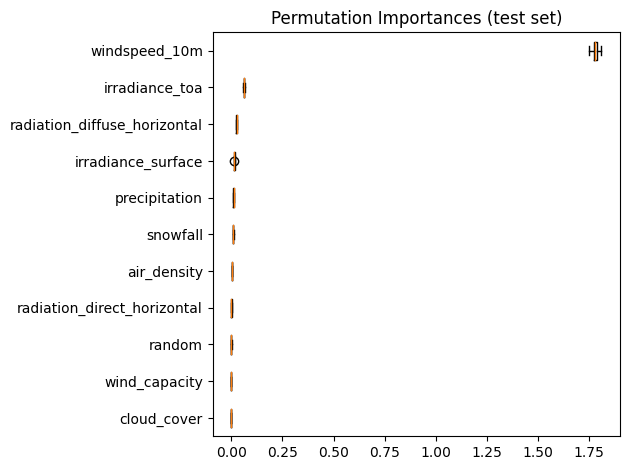

In [39]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

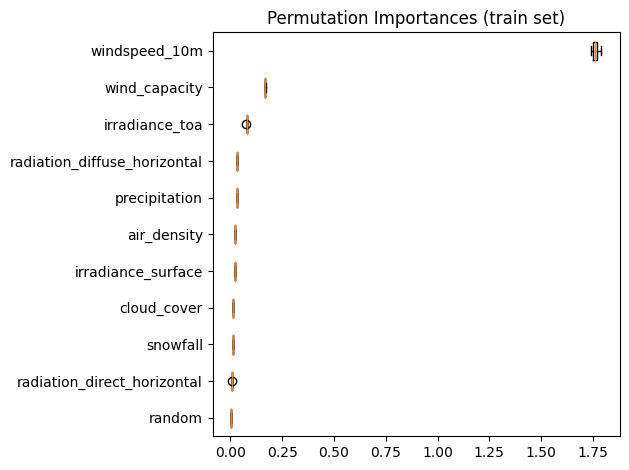

In [40]:
result = permutation_importance(rf, X_train, y_train, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

In [41]:
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

RF train accuracy: 0.993
RF test accuracy: 0.833


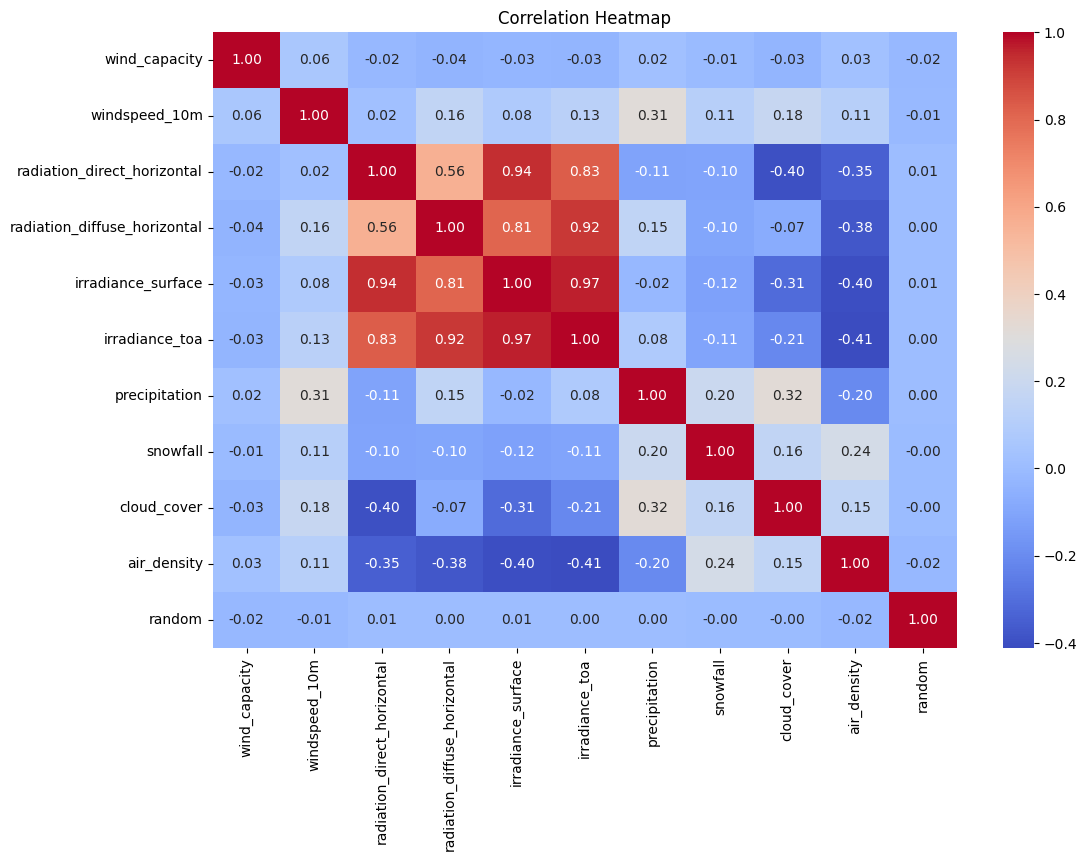

In [42]:
def plot_corr_heatmap(data, figsize=(12, 8)):
    corr_matrix = data.corr()
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

# Now you can use the function
viz = plot_corr_heatmap(X_train)

In [43]:
selected_features = ['windspeed_10m',
                     'radiation_diffuse_horizontal',
                     'precipitation',
                     'snowfall']

X_train = X_train_master_2[selected_features]
X_test = X_test_master_2[selected_features]

# Frist, we train the model for the prediction for wind power generation based on weather data.
rf = RandomForestRegressor(n_estimators=20)
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"The average score for the RandomForestRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
r2 = r2_score(y_test, predictions_rf)
print(f"The R2 score of the RandomForestRegression model (test) is: %0.3f" % r2)

print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

The average score for the RandomForestRegression model (training) is: 0.720
The R2 score of the RandomForestRegression model (test) is: 0.722
RF train accuracy: 0.980
RF test accuracy: 0.722


In [44]:
selected_features = ['windspeed_10m']

X_train = X_train_master_2[selected_features]
X_test = X_test_master_2[selected_features]

# Frist, we train the model for the prediction for wind power generation based on weather data.
rf = RandomForestRegressor(n_estimators=20)
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"The average score for the RandomForestRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
r2 = r2_score(y_test, predictions_rf)
print(f"The R2 score of the RandomForestRegression model (test) is: %0.3f" % r2)

print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

The average score for the RandomForestRegression model (training) is: 0.469
The R2 score of the RandomForestRegression model (test) is: 0.559
RF train accuracy: 0.932
RF test accuracy: 0.559
